<div style="font-family:Inter; text-align:center; font-size:36px;
            background-color:#5A5A5A; border-radius: 20px; padding: 10px">
    <b style="color: white">Introdução</b>
</div>


<div style="font-size: 28px; font-family:Inter"><b>Qual o objetivo da minha análise?</b></div>
<hr style="height:6px; background-color:#5A5A5A"></hr>
<p style="font-size: 23px; font-family: Inter"><b>Saber mais sobre as informações referente aos votos à prefeitura de candidatos pelos municípios do estado de SP, e sobre o perfil eleitoral dos votos. Minha análise se concentrará nas seguintes perguntas:</b> </p>
    <ul>
        <li> <p style="font-size: 20px; font-family:Inter">Em qual município o candidato X foi mais votado?</p></li>   
        <li> <p style="font-size: 20px; font-family:Inter">Qual candidato foi mais votado em cada município?</p></li>
        <li> <p style="font-size: 20px; font-family:Inter">Qual o candidato votado no estado de SP?</p></li>
        <li> <p style="font-size: 20px; font-family:Inter">Qual foi o candidato mais votado na minha cidade?</p></li>
        <li> <p style="font-size: 20px; font-family:Inter">Qual perfil do eleitorado (faixa etária, gênero, grau de escolaridade,
etc.) mais votou em cada candidato.</p></li>
    </ul>
    
<p style="font-size: 23px; font-family: Inter"><b>Para a análise, foram utilizados dois arquivos:</b> </p>
    <ul>
    <li> <p style="font-size: 20px; font-family:Inter">Um referente as informações de votos de candidatos por município no primeiro turno de 2020;</p></li>   
     <li> <p style="font-size: 20px; font-family:Inter">Um referente as informações de votos do perfil eleitoral.</p></li>
    </ul>

<div style="font-size: 28px; font-family:Inter"><b>Bibliotecas utilizadas</b></div>
<hr style="height:6px; background-color:#5A5A5A"></hr>

<div style="font-size: 20px; font-family:Inter">
    <ul>
        <li> <b>Pandas</b> para limpeza e manipulação dos dados;</li>   
        <li> <b>Matplotlib</b> para visualização gráfica dos dados;</li>
        <li> <b>Seaborn</b> para visualização gráficas estatísticas especificadas;     </li>
        <li> <b>Geopandas</b> para criação do mapa de SP; </li>
    </ul>
</div>

<div style="display: flex;">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" style="width: 200px; height: -100px; margin-right: 5px;">
  <img src="https://camo.githubusercontent.com/109927a15915074d15313889468aa9aa688de3b9e38cc4359a01f665d351114e/68747470733a2f2f6d6174706c6f746c69622e6f72672f5f7374617469632f6c6f676f322e737667" style="width: 200px; height: -100px; margin-right: 5px;">
   <img src="https://www.programsbuzz.com/sites/default/files/logo/seaborn-logo.png" style="width: 200px; height: -100px; margin-right: 5px;">
  <img src="https://i0.wp.com/bizweb.dktcdn.net/thumb/large/100/414/123/files/geopandas-logo-9cf92895-87d3-4ca9-bcc2-426a6d65f23c.png?v=1621567931202" style="width: 200px; height: -100px;">
</div>

<div style="font-size: 20px; font-family:Inter"> Também utilizei um arquivo geojson para importar o mapa do estado de SP, para uma melhor visualização dos votos.
</div>


<div style="width:100%;text-align: center;"> <img align=middle src="https://www.ssp.sp.gov.br/img/estatistica.png" alt="Heat beating" style="height:250px;margin-top:1rem;"> </div>


<div style="font-family:Inter; text-align:center; font-size:36px;
            background-color:#5A5A5A; border-radius: 20px; padding: 10px">
    <b style="color: white">Imports</b>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.options.display.max_columns = None #Não limitar o máximo de colunas do DataFrame
pd.options.mode.chained_assignment = None #Evitar avisos de cópias

<div style="font-size: 28px; font-family:Inter"><b>Importando os arquivos e analisando o material</b></div>
<hr style="height:6px; background-color:#5A5A5A"></hr>

In [3]:
#Arquivo do perfil dos eleitores

perfil_do_eleitor_sp = pd.read_csv('/kaggle/input/perfil-do-eleitor-sp/perfil_eleitoral_sp.csv', sep = ',', encoding = 'utf-8')

In [4]:
#Arquivo dos votos de candidatos

votos_sp_turno1 = pd.read_csv('/kaggle/input/votos-em-sp-1turno/votos_sp_turno1.csv', sep = ',', encoding = 'utf-8')

In [5]:
#Mapa de SP

mapa_municipios = gpd.read_file('/kaggle/input/mapa-sp/geojs-35-mun.json') 

In [6]:
#Visualizando a estrutura

perfil_do_eleitor_sp.head()

,Unnamed: 0,Ano da Eleição,Estado,Código do Município,Município de Voto,Gênero do Eleitor(a),Estado Cívil do Eleitor(a),Idade,Grau de Escolaridade do Eleitor(a),Qtd. a Votar
0,0,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,FEMININO,CASADO,70 a 74 anos,ENSINO FUNDAMENTAL INCOMPLETO,47
1,1,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,FEMININO,CASADO,70 a 74 anos,ENSINO FUNDAMENTAL COMPLETO,5
2,2,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,FEMININO,CASADO,70 a 74 anos,ENSINO MÉDIO INCOMPLETO,1
3,3,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,FEMININO,CASADO,70 a 74 anos,ENSINO MÉDIO COMPLETO,10
4,4,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,FEMININO,CASADO,70 a 74 anos,SUPERIOR COMPLETO,23


In [7]:
#Visualizando a estrutura(linhas e colunas)

perfil_do_eleitor_sp.shape

(599569, 10)

In [8]:
#Obtendo informações das colunas(se há nulos, total de informações, tipo de dados)

perfil_do_eleitor_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599569 entries, 0 to 599568
Data columns (total 10 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Unnamed: 0                          599569 non-null  int64 
 1   Ano da Eleição                      599569 non-null  int64 
 2   Estado                              599569 non-null  object
 3   Código do Município                 599569 non-null  int64 
 4   Município de Voto                   599569 non-null  object
 5   Gênero do Eleitor(a)                599569 non-null  object
 6   Estado Cívil do Eleitor(a)          599569 non-null  object
 7   Idade                               599569 non-null  object
 8   Grau de Escolaridade do Eleitor(a)  599569 non-null  object
 9   Qtd. a Votar                        599569 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 45.7+ MB


In [9]:
#Visualizando a estrutura do arquivo dos votos

votos_sp_turno1.head(5)

,Unnamed: 0,Nome do Candidato,Estado,Código do Município,Município,Qtd. de Votos,Cargo de Ocupação,Nome do Partido,Qtd. de Abstenções
0,0,BRANCOS OU NULOS,SP,71072,SÃO PAULO,5,Prefeito,BRANCOS OU NULOS,145
1,1,JILMAR TATTO,SP,71072,SÃO PAULO,4,Prefeito,Partido dos Trabalhadores,145
2,2,MARINA HELOU,SP,71072,SÃO PAULO,1,Prefeito,Rede Sustentabilidade,145
3,3,MÁRCIO FRANÇA,SP,71072,SÃO PAULO,29,Prefeito,Partido Socialista Brasileiro,145
4,4,BRUNO COVAS,SP,71072,SÃO PAULO,111,Prefeito,Partido da Social Democracia Brasileira,145


In [10]:
#Visualizando a estrutura(linhas e colunas)

votos_sp_turno1.shape

(798456, 9)

In [11]:
#Obtendo informações das colunas(se há nulos, total de informações, tipo de dados)

votos_sp_turno1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798456 entries, 0 to 798455
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           798456 non-null  int64 
 1   Nome do Candidato    798456 non-null  object
 2   Estado               798456 non-null  object
 3   Código do Município  798456 non-null  int64 
 4   Município            798456 non-null  object
 5   Qtd. de Votos        798456 non-null  int64 
 6   Cargo de Ocupação    798456 non-null  object
 7   Nome do Partido      798456 non-null  object
 8   Qtd. de Abstenções   798456 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 54.8+ MB


In [12]:
#Analisando as medidas de tendência central

votos_sp_turno1.describe()

,Unnamed: 0,Código do Município,Qtd. de Votos,Qtd. de Abstenções
count,798456.000000,798456.000000,798456.000000,798456.000000
mean,399227.500000,68182.059373,30.559745,109.095913
std,230494.537606,3449.224776,38.754951,28.680980
min,0.000000,61000.000000,1.000000,1.000000
25%,199613.750000,64777.000000,5.000000,90.000000
50%,399227.500000,70335.000000,17.000000,107.000000
75%,598841.250000,71072.000000,37.000000,127.000000
max,798455.000000,72737.000000,329.000000,385.000000


<div style="font-family:Inter; text-align:center; font-size:36px;
            background-color:#5A5A5A; border-radius: 20px; padding: 10px">
    <b style="color: white">Em qual município o candidato X foi mais votado?</b>
</div>

<div style="font-size: 23px; font-family:Inter"><b>Candidato escolhido: Arthur do Val Mamãe Falei</b></div>

In [13]:
# Definindo o nome do candidato de interesse
nome_candidato = "ARTHUR DO VAL MAMÃE FALEI"

# Agregando os votos totais por candidato e município
votos_totais = votos_sp_turno1.groupby(['Nome do Candidato', 'Município'])['Qtd. de Votos'].sum().reset_index()

# Convertendo o resultado em um DataFrame pandas
votos_totais = pd.DataFrame(votos_totais)

# Filtrando os votos para o candidato específico (Arthur do Val)
votos_arthur = votos_totais.loc[votos_totais['Nome do Candidato'] == nome_candidato]

# Formatando os nomes dos municípios para ter a primeira letra em maiúscula
votos_arthur['Município'] = votos_arthur['Município'].str.title()

# Exibindo o resultado final para os votos de Arthur do Val
votos_arthur


,Nome do Candidato,Município,Qtd. de Votos
173,ARTHUR DO VAL MAMÃE FALEI,São Paulo,522210


In [14]:
# Convertendo o mapa dos municípios em um DataFrame pandas
mapa_municipios = pd.DataFrame(mapa_municipios)

# Renomeando a coluna 'name' para 'Município'
mapa_municipios.rename({'name': 'Município'}, axis=1, inplace=True)

# Exibindo o DataFrame resultante com os nomes dos municípios
mapa_municipios


,id,Município,description,geometry
0,3500105,Adamantina,Adamantina,"POLYGON ((-51.05787 -21.39888, -51.05365 -21.4..."
1,3500204,Adolfo,Adolfo,"POLYGON ((-49.65478 -21.20607, -49.63847 -21.2..."
2,3500303,Aguaí,Aguaí,"POLYGON ((-47.20890 -21.97129, -47.20297 -21.9..."
3,3500402,Águas da Prata,Águas da Prata,"POLYGON ((-46.70755 -21.82895, -46.70380 -21.8..."
4,3500501,Águas de Lindóia,Águas de Lindóia,"POLYGON ((-46.61147 -22.43496, -46.60302 -22.4..."
...,...,...,...,...
640,3557006,Votorantim,Votorantim,"POLYGON ((-47.37268 -23.51783, -47.37047 -23.5..."
641,3557105,Votuporanga,Votuporanga,"POLYGON ((-50.02073 -20.33347, -50.01275 -20.3..."
642,3557154,Zacarias,Zacarias,"POLYGON ((-49.99521 -21.03253, -49.98434 -21.0..."
643,3557204,Chavantes,Chavantes,"POLYGON ((-49.68539 -22.94866, -49.68396 -22.9..."


In [15]:

#Realizando a união do DataFrame de Municípios e dos Votos do Arthur.
cid_mais_votos = mapa_municipios.merge(votos_arthur, on = 'Município', how = 'left').fillna(0)
#Visualizando as colunas
cid_mais_votos[['Município', 'Qtd. de Votos', 'geometry']].head()
#Buscando por São Paulo
cid_mais_votos.loc[cid_mais_votos['Município'] == 'São Paulo']  

,id,Município,description,geometry,Nome do Candidato,Qtd. de Votos
562,3550308,São Paulo,São Paulo,"POLYGON ((-46.53723 -23.36918, -46.54499 -23.3...",ARTHUR DO VAL MAMÃE FALEI,522210.0


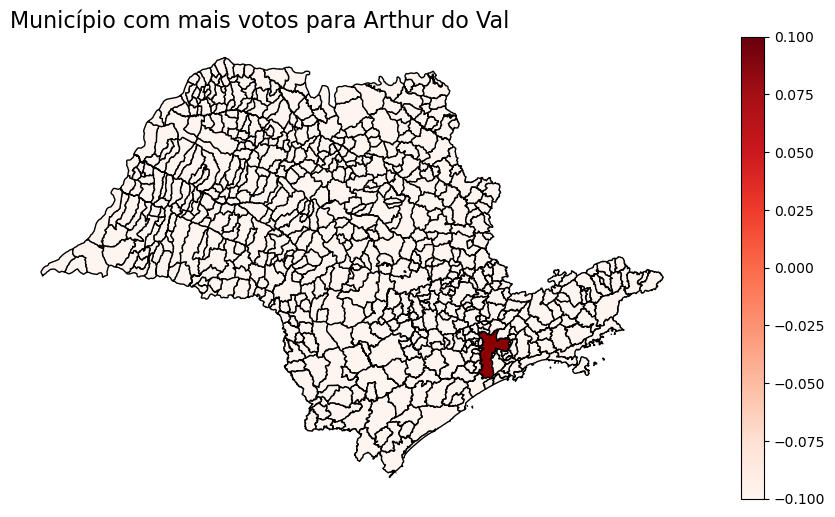

In [16]:
#Armazenar municípios que são diferentes de São Paulo
outros_municipios = cid_mais_votos[cid_mais_votos['Município'] != 'São Paulo']
#Armanezando a cidade com mais votos no candidato(São Paulo)
cidade_sao_paulo = cid_mais_votos[cid_mais_votos['Município'] == 'São Paulo']

#Importando a geografia dos municípios do estado de SP
gdf_outros = gpd.GeoDataFrame(outros_municipios, geometry='geometry')

#Determinando o tamanho da figura
fig, ax = plt.subplots(figsize=(12, 6))

# Plotar os outros municípios em tons de vermelho
gdf_outros.plot(ax=ax, column='Qtd. de Votos', cmap='Reds', legend=True, edgecolor='Black')

# Filtrar apenas a cidade de São Paulo
gdf_sao_paulo = gpd.GeoDataFrame(cidade_sao_paulo, geometry='geometry')

# Plotar a cidade de São Paulo em vermelho
gdf_sao_paulo.plot(ax=ax, color='darkred', edgecolor='Black')

#Colocando um título
ax.set_title('Município com mais votos para Arthur do Val', loc='left', fontsize=16)
ax.set_axis_off()

#Mostrar gráfico
plt.show()


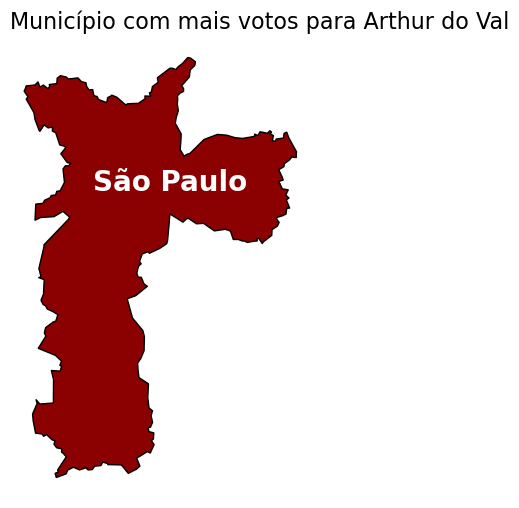

In [17]:
# Filtrar apenas a cidade de São Paulo
gdf = gpd.GeoDataFrame(cidade_sao_paulo, geometry='geometry')

#Determinando o tamanho da figura
fig, ax = plt.subplots(figsize=(12, 6))

# Plotar a cidade de São Paulo
gdf.plot(ax=ax, color='darkred', edgecolor='black')  # Apenas borda preta

# Anotação do nome da cidade
for idx, row in gdf.iterrows():
    ax.annotate(row['Município'], xy=(row.geometry.centroid.x + 0.07, row.geometry.centroid.y + 0.10), 
                fontsize=20, weight='bold', color='white', ha='center', va='center')

#Colocando um título    
ax.set_title('Município com mais votos para Arthur do Val', loc='left', fontsize=16)
ax.set_axis_off()

#Mostrar gráfico
plt.show()

<div style="font-family:Inter; text-align:center; font-size:36px;
            background-color:#5A5A5A; border-radius: 20px; padding: 10px">
    <b style="color: white">Qual candidato foi mais votado em cada município?</b>
</div>

In [18]:
# Agrupa os votos por candidato e município, somando a quantidade de votos para cada combinação
votos_por_municipio = votos_sp_turno1.groupby(['Nome do Candidato', 'Município'])['Qtd. de Votos'].sum()

# Cria um novo DataFrame a partir dos resultados da agregação de votos por candidato e município
votos_por_municipio = pd.DataFrame(votos_por_municipio)

# Encontra o índice do candidato com a maior quantidade de votos em cada município
candidato_mais_votado_por_municipio = votos_por_municipio.groupby('Município')['Qtd. de Votos'].idxmax()

# Filtra o DataFrame original para selecionar as linhas correspondentes aos candidatos mais votados em cada município
resultado = pd.DataFrame(votos_por_municipio.loc[candidato_mais_votado_por_municipio])

# Ordena o DataFrame resultante com base na quantidade de votos, em ordem decrescente
resultado = resultado.sort_values(by='Qtd. de Votos', ascending=False)

# Reinicia os índices do DataFrame resultante para facilitar a indexação
resultado = resultado.reset_index()
resultado

,Nome do Candidato,Município,Qtd. de Votos
0,BRUNO COVAS,SÃO PAULO,1754013
1,PAULO SERRA,SANTO ANDRÉ,266591
2,ORLANDO MORANDO,SÃO BERNARDO DO CAMPO,261761
3,GUTI,GUARULHOS,261211
4,FELICIO,SÃO JOSÉ DOS CAMPOS,204800
...,...,...,...
640,JORDÃO,ÓLEO,666
641,GICA,FLORA RICA,622
642,LUCIO BISQUI,NOVA CASTILHO,537
643,LUIZ,BORÁ,501


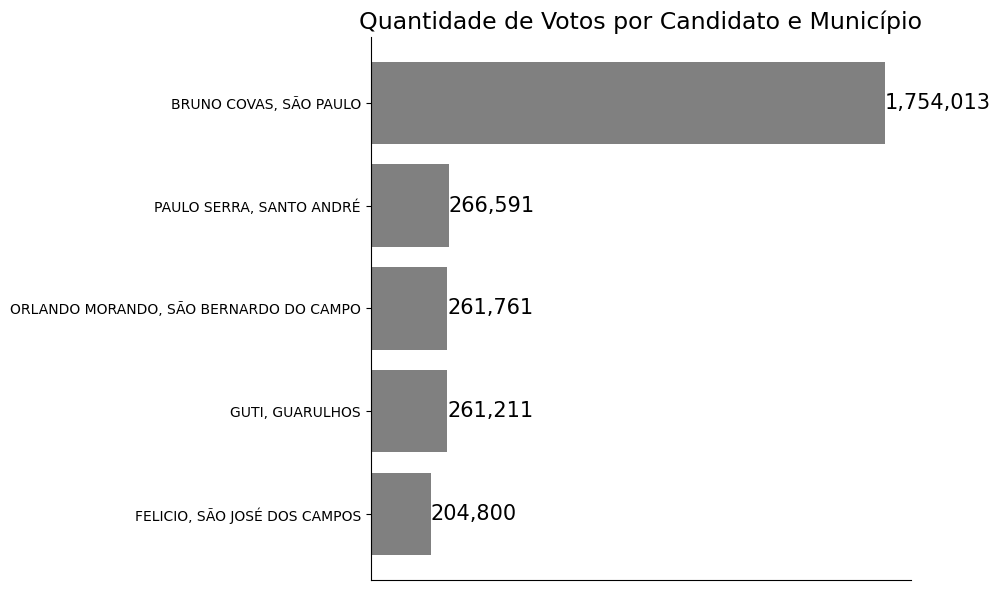

In [19]:
#Selecionando os cinco primeiros munícipios com mais votos
cinco_municipios_exemplares = resultado.head(5)

# Criar uma figura e eixos para o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Criar o gráfico de barras horizontais
bars = ax.barh(cinco_municipios_exemplares['Nome do Candidato'] + ', ' + cinco_municipios_exemplares['Município'], cinco_municipios_exemplares['Qtd. de Votos'], color='gray')

# Adicionar rótulos de valores nas barras
for bar in bars:
    value = bar.get_width()
    ax.text(value + 100, bar.get_y() + bar.get_height()/2, f'{value:,}', va='center', color='black', fontsize=15)

# Personalizar os eixos
ax.set_title('Quantidade de Votos por Candidato e Município', fontsize=17) #título
ax.xaxis.set_visible(False) #remover eixo x
ax.spines['top'].set_visible(False) #remover borda superior
ax.spines['right'].set_visible(False) #remover borda direita

# Inverter a ordem do eixo Y para mostrar o candidato mais votado no topo
ax.invert_yaxis()

# Exibir o gráfico
plt.tight_layout()
plt.show()








<div style="font-family:Inter; text-align:center; font-size:36px;
            background-color:#5A5A5A; border-radius: 20px; padding: 10px">
    <b style="color: white">Qual o candidato mais votado no estado de SP?</b>
</div>

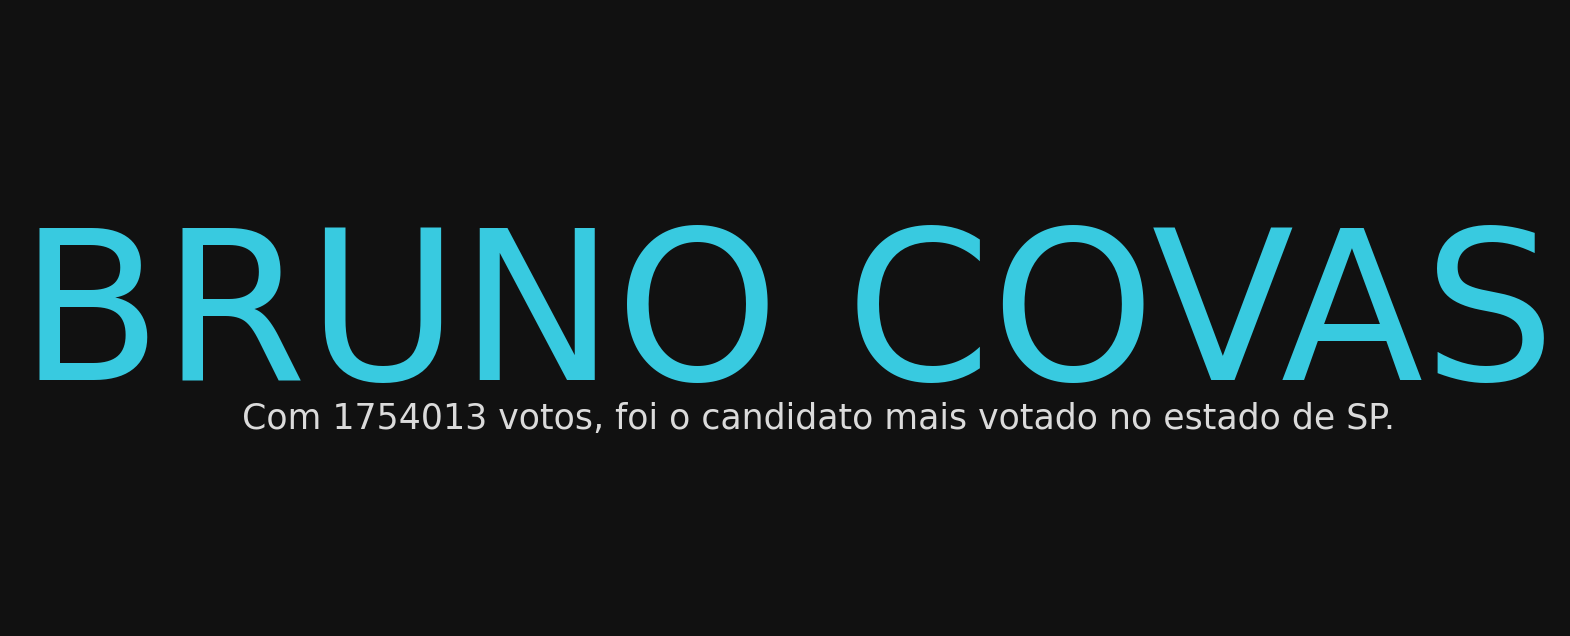

In [20]:
# Seleciona o nome do candidato mais votado na primeira posição do resultado
prefeito_mais_votado = resultado['Nome do Candidato'][0]

# Obtém o número máximo de votos dentre os resultados
numero_de_votos = resultado['Qtd. de Votos'].max()

# Cria uma nova figura com tamanho 20x8 e define a cor de fundo
fig = plt.figure(figsize=(20, 8))
fig.patch.set_facecolor('#111111')

# Adiciona o texto do nome do prefeito mais votado na posição desejada, com formato, tamanho e cor especificados
plt.text(x=0.006,
         y=0.4,
         s=str(prefeito_mais_votado),
         multialignment='center',
         fontsize=150,
         color='#38cae0'
         )

# Adiciona o texto com o número de votos e a descrição, na posição e com formatação definidas
plt.text(x=0.15,
         y=0.32,
         s='Com {} votos, foi o candidato mais votado no estado de SP.'.format(numero_de_votos),
         fontsize=25,
         multialignment='center',
         color='#dbdbdb'
         )

# Desativa os eixos para não exibir as coordenadas
plt.axis('off')

# Mostra a figura resultante
plt.show()


<div style="font-family:Inter; text-align:center; font-size:36px;
            background-color:#5A5A5A; border-radius: 20px; padding: 10px">
    <b style="color: white">Qual foi o candidato mais votado na minha cidade?</b>
</div>

<div style="font-size: 23px; font-family:Inter"><b>Agora, gostaria de saber qual foi o candidato mais votado na minha cidade, a cidade de Mauá.</b></div>

In [21]:
# Agrupa os votos por candidato e município, somando a quantidade de votos para cada combinação
candidatos_maua = votos_sp_turno1.groupby(['Nome do Candidato', 'Município'])['Qtd. de Votos'].sum().reset_index()

# Filtra o DataFrame de candidatos de Mauá para selecionar as linhas correspondentes à cidade de Mauá
candidato_mais_votado_maua = candidatos_maua.loc[candidatos_maua['Município'] == 'MAUÁ']

# Filtra o DataFrame resultante para selecionar a linha que possui a maior quantidade de votos em Mauá
candidato_mais_votado_maua = candidato_mais_votado_maua.loc[candidato_mais_votado_maua['Qtd. de Votos'] == candidato_mais_votado_maua['Qtd. de Votos'].max()]

# Mostra o DataFrame resultante, que contém o candidato mais votado em Mauá e a quantidade de votos
candidato_mais_votado_maua



,Nome do Candidato,Município,Qtd. de Votos
176,ATILA,MAUÁ,70490


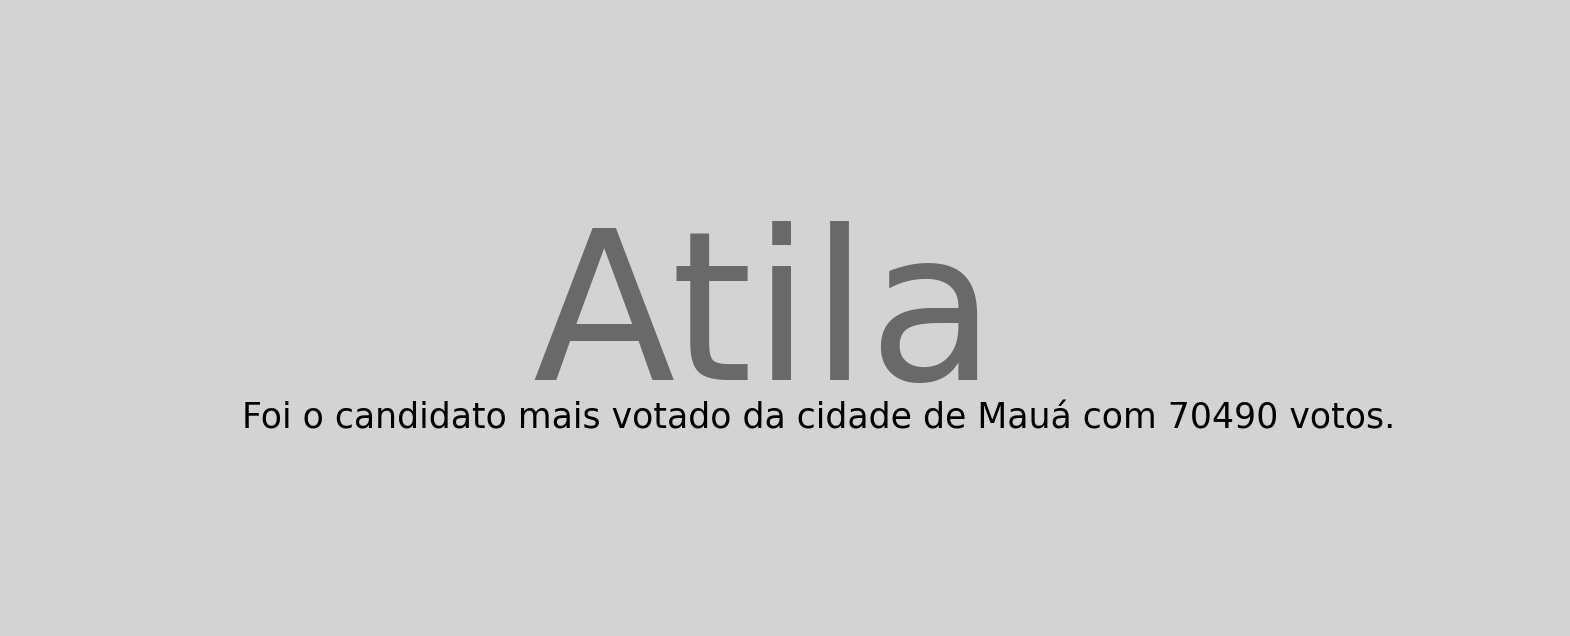

In [22]:
# Define o nome do prefeito mais votado como 'Atila'
prefeito_mais_votado = 'Atila'

# Obtém o número máximo de votos dentre os resultados do candidato mais votado em Mauá
numero_de_votos = candidato_mais_votado_maua['Qtd. de Votos'].max()

# Cria uma nova figura com tamanho 20x8 e define a cor de fundo como 'lightgrey'
fig = plt.figure(figsize=(20, 8))
fig.patch.set_facecolor('lightgrey')

# Adiciona o texto do nome do prefeito mais votado na posição desejada, com formato, tamanho e cor especificados
plt.text(x=0.337,
         y=0.4,
         s=str(prefeito_mais_votado),
         multialignment='center',
         fontsize=150,
         color='dimgray'
         )

# Adiciona o texto com o número de votos e a descrição, na posição e com formatação definidas
plt.text(x=0.15,
         y=0.32,
         s='Foi o candidato mais votado da cidade de Mauá com {} votos.'.format(numero_de_votos),
         fontsize=25,
         multialignment='center',
         color='k'
         )

# Desativa os eixos para não exibir as coordenadas
plt.axis('off')

# Mostra a figura resultante
plt.show()


<div style="font-family:Inter; text-align:center; font-size:36px;
            background-color:#5A5A5A; border-radius: 20px; padding: 10px">
    <b style="color: white">Qual perfil do eleitorado (faixa etária, gênero, grau de escolaridade, etc.) mais votou em cada candidato?</b>
</div>

In [23]:
votos_sp_turno1.columns

Index(['Unnamed: 0', 'Nome do Candidato', 'Estado', 'Código do Município',
       'Município', 'Qtd. de Votos', 'Cargo de Ocupação', 'Nome do Partido',
       'Qtd. de Abstenções'],
      dtype='object')

In [24]:
perfil_do_eleitor_sp.columns

Index(['Unnamed: 0', 'Ano da Eleição', 'Estado', 'Código do Município',
       'Município de Voto', 'Gênero do Eleitor(a)',
       'Estado Cívil do Eleitor(a)', 'Idade',
       'Grau de Escolaridade do Eleitor(a)', 'Qtd. a Votar'],
      dtype='object')

Como são muitas informações para unificar os arquivos, vou dividir as tarefas e eliminar colunas que não serão utilizadas para responder esta pergunta. Primeiro, vou realizar uma pesquisa referente ao gênero dos candidatos

In [25]:
# Primeiro, realizei uma junção do nome do candidato e seu total de votos
grouped_votos = votos_sp_turno1.groupby(['Nome do Candidato', 'Código do Município'])['Qtd. de Votos'].sum()
# Segundo, realizei uma junção municipio, características do eleitor e seu total de votos
grouped_perfil = perfil_do_eleitor_sp.groupby(['Município de Voto','Código do Município',
                                               'Gênero do Eleitor(a)','Idade',
                                'Grau de Escolaridade do Eleitor(a)'])['Qtd. a Votar'].sum()

# Resetar os índices dos dataframes agrupados
grouped_votos = grouped_votos.reset_index()
grouped_perfil = grouped_perfil.reset_index()



In [26]:
#Aqui, realizei a junção dos dois DataFrames criados logo acima, como se fosse um JOIN.

#A chave de junção para os dois arquivos foi a coluna 'Código do Município'

perfil_e_votos = pd.merge(grouped_votos, grouped_perfil, on='Código do Município', how='left')
perfil_e_votos

,Nome do Candidato,Código do Município,Qtd. de Votos,Município de Voto,Gênero do Eleitor(a),Idade,Grau de Escolaridade do Eleitor(a),Qtd. a Votar
0,ABELARDINHO,62030,7315,BARIRI,FEMININO,100 anos ou mais,ANALFABETO,7
1,ABELARDINHO,62030,7315,BARIRI,FEMININO,100 anos ou mais,ENSINO FUNDAMENTAL COMPLETO,1
2,ABELARDINHO,62030,7315,BARIRI,FEMININO,100 anos ou mais,ENSINO FUNDAMENTAL INCOMPLETO,17
3,ABELARDINHO,62030,7315,BARIRI,FEMININO,100 anos ou mais,ENSINO MÉDIO COMPLETO,1
4,ABELARDINHO,62030,7315,BARIRI,FEMININO,100 anos ou mais,LÊ E ESCREVE,4
...,...,...,...,...,...,...,...,...
893280,ÉRICA GORGA,68756,14470,PIRACICABA,MASCULINO,95 a 99 anos,ENSINO MÉDIO COMPLETO,24
893281,ÉRICA GORGA,68756,14470,PIRACICABA,MASCULINO,95 a 99 anos,ENSINO MÉDIO INCOMPLETO,8
893282,ÉRICA GORGA,68756,14470,PIRACICABA,MASCULINO,95 a 99 anos,LÊ E ESCREVE,197
893283,ÉRICA GORGA,68756,14470,PIRACICABA,MASCULINO,95 a 99 anos,SUPERIOR COMPLETO,36


<div style="font-family:Inter; text-align:center; font-size:36px;
            background-color:#5A5A5A; border-radius: 20px; padding: 10px">
    <b style="color: white">Qual gênero mais votou em cada candidato?</b>
</div>

In [27]:
# Calcule a soma da quantidade de votos por candidato e gênero,
# e crie uma tabela dinâmica (pivot table) com os gêneros como colunas
votos_por_candidato_genero = perfil_e_votos.groupby(['Nome do Candidato', 'Gênero do Eleitor(a)'])['Qtd. a Votar'].sum().unstack()

#Criando um novo DataFrame para armazenar as informações
votos_por_candidato_genero = pd.DataFrame(votos_por_candidato_genero)

#Exibir resultado
votos_por_candidato_genero


Gênero do Eleitor(a),FEMININO,MASCULINO
Nome do Candidato,,
ABELARDINHO,13036,12169
ABIGAIL,1373,1342
ABRAHÃO PEDRO,6364,6019
ACÁCIO,3090,3020
ADAILTON,1743,1668
...,...,...
ZÓI DA BORRACHARIA,5705,5682
ÁLVARO ALENCAR,51407,47139
ÉDER ANTONELLI,19886,18516


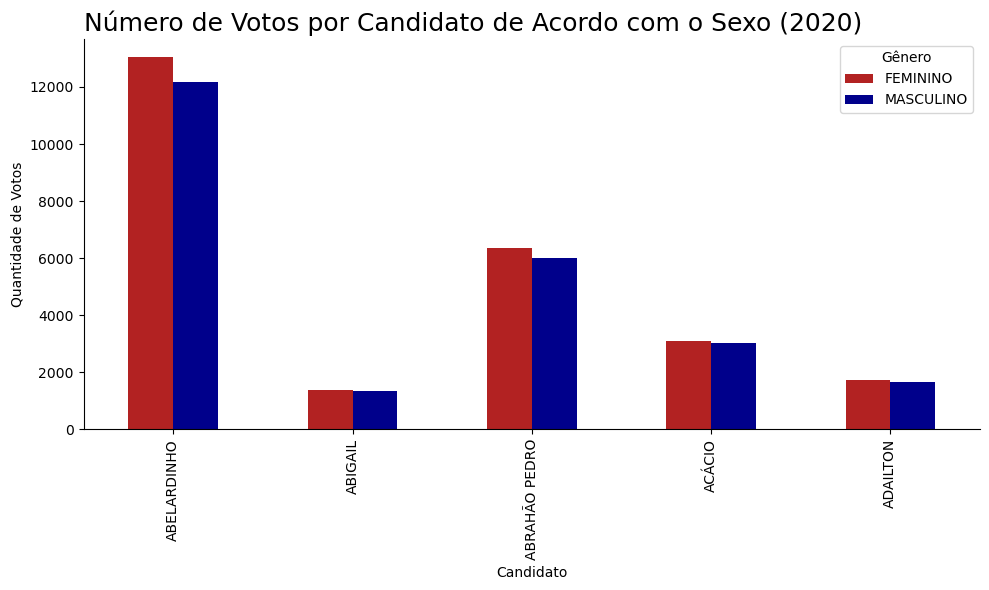

In [28]:
# Selecionar as primeiras 5 linhas para exemplo
votos_por_genero = votos_por_candidato_genero.head(5)

# Criar um gráfico de barras
ax = votos_por_genero.plot(kind='bar', stacked=False, color=['firebrick', 'darkblue'], figsize=(10, 6))

# Remover as bordas superior e direita do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Definir título, rótulos dos eixos e legenda
ax.set_title('Número de Votos por Candidato de Acordo com o Sexo (2020)', fontsize=18, loc='left')
ax.set_xlabel('Candidato')
ax.set_ylabel('Quantidade de Votos')
ax.legend(title='Gênero')

# Ajustar o layout para melhorar a visualização
plt.tight_layout()

# Exibir o gráfico
plt.show()

<div style="font-family:Inter; text-align:center; font-size:36px;
            background-color:#5A5A5A; border-radius: 20px; padding: 10px">
    <b style="color: white">Qual faixa etária mais votou em cada candidato?</b>
</div>

In [29]:
# Calcula uma máscara booleana indicando se a quantidade de votos é a maior para cada candidato
idade_mais_votos = perfil_e_votos.groupby('Nome do Candidato')['Qtd. a Votar'].transform(max) == perfil_e_votos['Qtd. a Votar']

# Selecione as linhas onde a máxima quantidade de votos foi alcançada para cada candidato
votos_por_idade = perfil_e_votos[idade_mais_votos]

# Exiba o DataFrame resultante
votos_por_idade


,Nome do Candidato,Código do Município,Qtd. de Votos,Município de Voto,Gênero do Eleitor(a),Idade,Grau de Escolaridade do Eleitor(a),Qtd. a Votar
87,ABELARDINHO,62030,7315,BARIRI,FEMININO,60 a 64 anos,ENSINO FUNDAMENTAL INCOMPLETO,490
457,ABIGAIL,61298,1447,ALVINLÂNDIA,MASCULINO,40 a 44 anos,ENSINO FUNDAMENTAL INCOMPLETO,65
569,ABRAHÃO PEDRO,62006,87,ILHA COMPRIDA,FEMININO,35 a 39 anos,ENSINO MÉDIO COMPLETO,247
956,ACÁCIO,66630,2642,MACAUBAL,MASCULINO,35 a 39 anos,ENSINO MÉDIO COMPLETO,132
1177,ADAILTON,61476,1514,ANHUMAS,MASCULINO,30 a 34 anos,ENSINO MÉDIO COMPLETO,82
...,...,...,...,...,...,...,...,...
891969,ZÓI DA BORRACHARIA,65277,2167,IPUÃ,MASCULINO,25 a 29 anos,ENSINO MÉDIO COMPLETO,299
892115,ÁLVARO ALENCAR,63118,519,CARAGUATATUBA,FEMININO,25 a 29 anos,ENSINO MÉDIO COMPLETO,2429
892435,ÉDER ANTONELLI,63096,931,CAPIVARI,FEMININO,30 a 34 anos,ENSINO MÉDIO COMPLETO,870
892715,ÉLITO,71234,2270,SARAPUÍ,FEMININO,25 a 29 anos,ENSINO MÉDIO COMPLETO,179


In [30]:
faixa_etaria_mais_votos = votos_por_idade.groupby('Idade')['Qtd. a Votar'].sum()
faixa_etaria_mais_votos

Idade
21 a 24 anos                       127293
25 a 29 anos                       559435
30 a 34 anos                       484388
35 a 39 anos                      5526102
40 a 44 anos                         3483
45 a 49 anos                        18372
50 a 54 anos                        22525
55 a 59 anos                        26421
60 a 64 anos                        13204
65 a 69 anos                          666
Name: Qtd. a Votar, dtype: int64

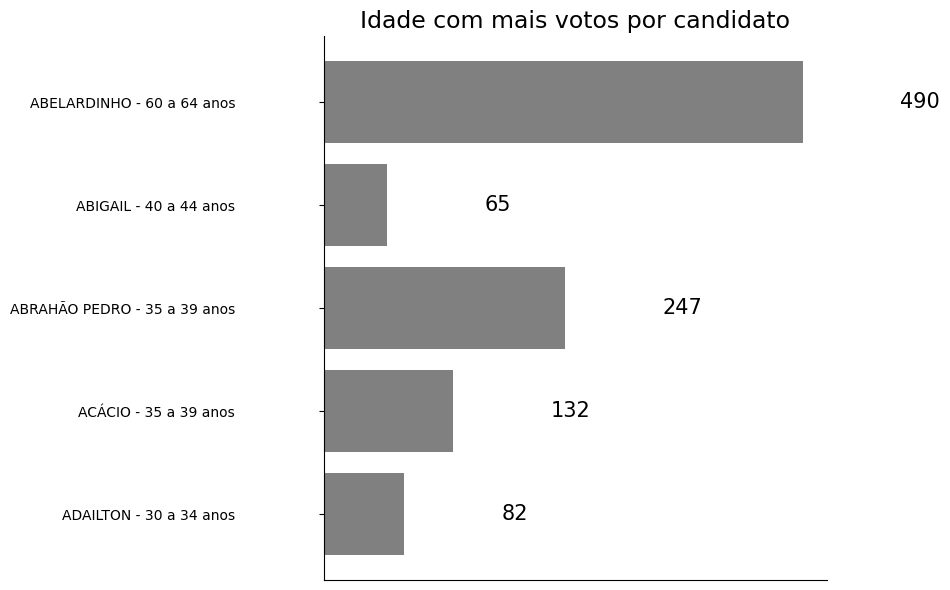

In [31]:
#Selecionando os cinco primeiros candidatos
votos_por_idade_para_candidatos = votos_por_idade.head(5)

# Criar uma figura e eixos para o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Criar o gráfico de barras horizontais
bars = ax.barh(votos_por_idade_para_candidatos['Nome do Candidato'] + ' - ' + votos_por_idade_para_candidatos['Idade'], votos_por_idade_para_candidatos['Qtd. a Votar'], color='gray')

# Adicionar rótulos de valores nas barras
for bar in bars:
    value = bar.get_width()
    ax.text(value + 100, bar.get_y() + bar.get_height()/2, f'{value:,}', va='center', color='black', fontsize=15)

# Personalizar os eixos
ax.set_title('Idade com mais votos por candidato', fontsize=17) #título
ax.xaxis.set_visible(False) #remover eixo x
ax.spines['top'].set_visible(False) #remover borda superior
ax.spines['right'].set_visible(False) #remover borda direita

# Inverter a ordem do eixo Y para mostrar o candidato mais votado no topo
ax.invert_yaxis()

# Exibir o gráfico
plt.tight_layout()
plt.show()

<div style="font-family:Inter; text-align:center; font-size:36px;
            background-color:#5A5A5A; border-radius: 20px; padding: 10px">
    <b style="color: white">Qual grau de escolaridade mais votou em cada candidato?</b>
</div>

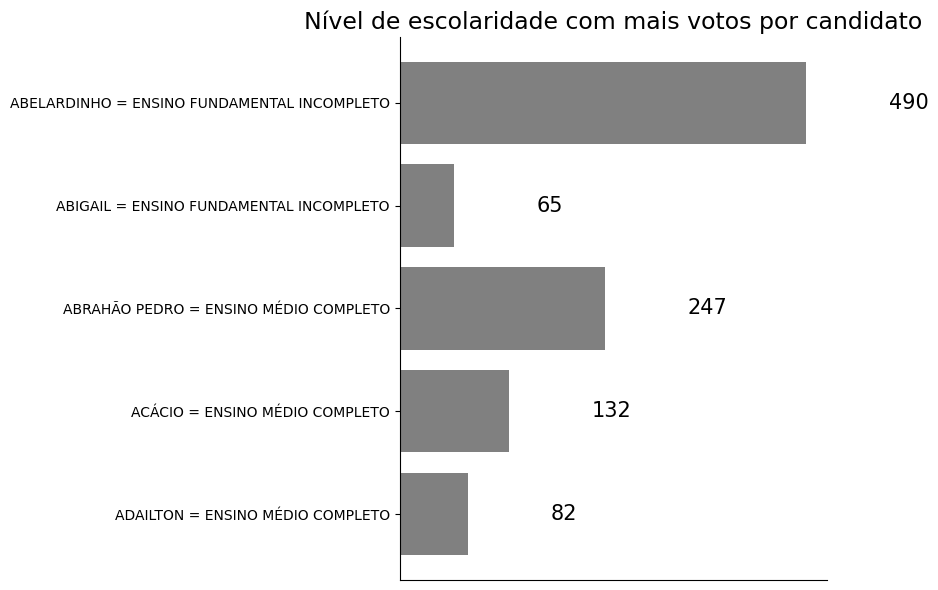

In [32]:
#Selecionando os cinco primeiros candidatos
votos_por_escolaridade = votos_por_idade.head(5)

# Criar uma figura e eixos para o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Criar o gráfico de barras horizontais
bars = ax.barh(votos_por_escolaridade['Nome do Candidato'] + ' = ' + votos_por_escolaridade['Grau de Escolaridade do Eleitor(a)'], votos_por_escolaridade['Qtd. a Votar'], color='gray')

# Adicionar rótulos de valores nas barras
for bar in bars:
    value = bar.get_width()
    ax.text(value + 100, bar.get_y() + bar.get_height()/2, f'{value:,}', va='center', color='black', fontsize=15)

# Personalizar os eixos
ax.set_title('Nível de escolaridade com mais votos por candidato', fontsize=17) #título
ax.xaxis.set_visible(False) #remover eixo x
ax.spines['top'].set_visible(False) #remover borda superior
ax.spines['right'].set_visible(False) #remover borda direita

# Inverter a ordem do eixo Y para mostrar o candidato mais votado no topo
ax.invert_yaxis()

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [33]:
escolaridade_mais_votos = votos_por_idade.groupby('Grau de Escolaridade do Eleitor(a)')['Qtd. a Votar'].sum()
escolaridade_mais_votos

Grau de Escolaridade do Eleitor(a)
ENSINO FUNDAMENTAL INCOMPLETO      83702
ENSINO MÉDIO COMPLETO            6420425
ENSINO MÉDIO INCOMPLETO           110116
SUPERIOR COMPLETO                 166074
SUPERIOR INCOMPLETO                 1572
Name: Qtd. a Votar, dtype: int64

<div style="font-family:Inter; text-align:center; font-size:36px;
            background-color:#5A5A5A; border-radius: 20px; padding: 10px">
    <b style="color: white">Conclusões </b>
</div>

<div style="font-size: 28px; font-family:Inter"><b>Após uma análise dos dados, podemos concluir que:</b></div>


   <ul>
    <li><p style="font-size: 20px; font-family: Inter">Para o <b>Arthur do Val Mamãe Falei</b>, o município que mais votou no candidato foi <b>São Paulo</b>;</p></li>
    <li><p style="font-size: 20px; font-family: Inter">Nas cidades de <b>Santo André</b>, <b>São Bernardo do Campo</b> e <b>Guarulhos</b>, seus respectivos candidatos mais votados foram: <b>Paulo Guerra</b>,<b>Orlando Morando</b> e <b>Guti</b>;</p></li>
    <li><p style="font-size: 20px; font-family: Inter">O candidato mais votado no estado de <b>SP</b>, foi <b>Bruno Covas</b> com 1754013 votos;</p></li>
    <li><p style="font-size: 20px; font-family: Inter">O candidato mais votado na minha cidade, a cidade de Mauá, foi <b>Atila</b>, com 70490 votos;</p></li>
    <li><p style="font-size: 20px; font-family: Inter">O gênero com mais votos é o feminino</p></li>
    <li><p style="font-size: 20px; font-family: Inter">A maior faixa etária de votos é entre 35 a 39 anos, com 5526102 votos.</p></li>
     <li><p style="font-size: 20px; font-family: Inter">A maior parte dos eleitores possui como nível de escolaridade o ensino médio completo. </p></li>
</ul>